In [29]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Đọc dữ liệu từ các tệp CSV đã tải lên
rfm = pd.read_csv('/content/gdrive/MyDrive/FINALPROJECT/[Project1]_DL07_K302_NguyenManhDuc_NguyenBuiThanhTruc /rfm.csv')
print(rfm.describe())

           Recency    Frequency     Monetary
count  3898.000000  3898.000000  3898.000000
mean   3565.701385     9.882247    84.897332
std     159.912688     5.269804    55.347995
min    3378.000000     1.000000     1.100000
25%    3435.000000     6.000000    43.570000
50%    3519.000000     9.000000    74.755000
75%    3658.000000    13.000000   114.975000
max    4105.000000    36.000000   361.450000


In [13]:
def assign_segment(row):
    R = row['Recency']
    F = row['Frequency']
    M = row['Monetary']

    # VIP: Mua gần, Frequency cao và chi tiêu trung bình trở lên.
    if R < 3550 and F >= 10 and M >= 75:
        return 'VIP'
    # Lost Loyal: Mua hàng đã lâu (≥3650), nhưng trước đây có Frequency đủ (≥5) và chi tiêu ổn định.
    elif R >= 3650 and F >= 5 and M >= 75:
        return 'Lost Loyal'
    # Potential: Recency từ 3550 đến 3650, Frequency từ 3 đến 9, Monetary từ 50 đến 100.
    elif 3550 <= R < 3650 and 3 <= F <= 9 and 50 <= M < 100:
        return 'Potential'
    # Inactive/Low-Value: Hoặc Frequency = 1 hoặc Monetary < 50 hoặc Recency > 3650 (rất lâu)
    elif F == 1 or M < 50 or R > 3650:
        return 'Inactive/Low-Value'
    else:
        return 'Others'


In [23]:
# Tạo cột "Segment"
rfm['Segment'] = rfm.apply(assign_segment, axis=1)
print("\nPhân bố các phân đoạn:")
print(rfm['Segment'].value_counts())


Phân bố các phân đoạn:
Segment
Inactive/Low-Value    1403
VIP                   1146
Others                 952
Lost Loyal             251
Potential              146
Name: count, dtype: int64


#Visualization

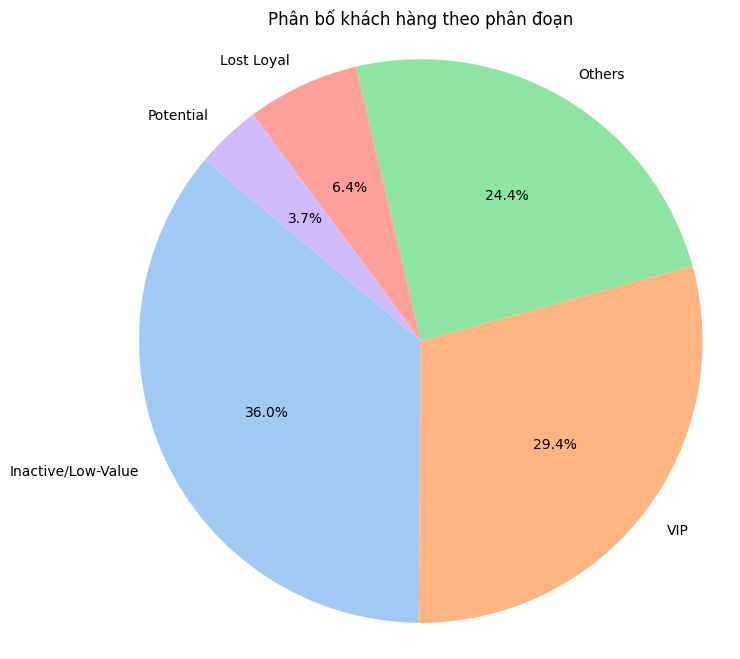

In [28]:
# 1. Pie Chart: Phân bố khách hàng theo phân đoạn
segment_counts = rfm['Segment'].value_counts()

plt.figure(figsize=(8,8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Phân bố khách hàng theo phân đoạn")
plt.axis('equal')
plt.show()

<ipython-input-27-bd68c7b4ca42>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Segment", y="Recency", data=rfm, palette="Set3")


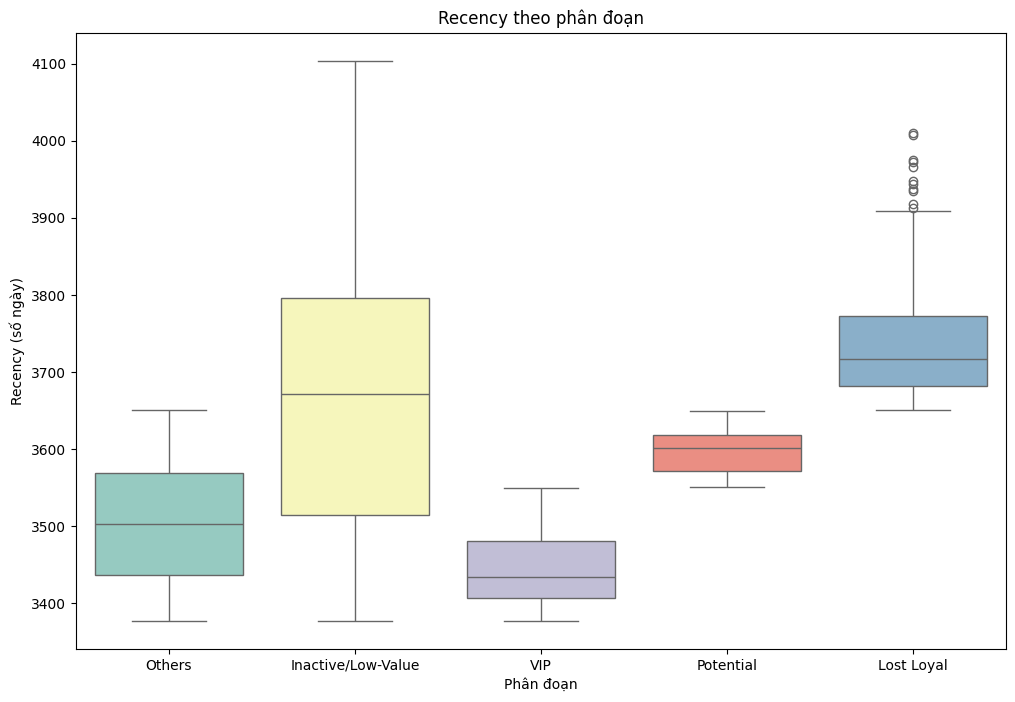

<ipython-input-27-bd68c7b4ca42>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Segment", y="Frequency", data=rfm, palette="Set3")


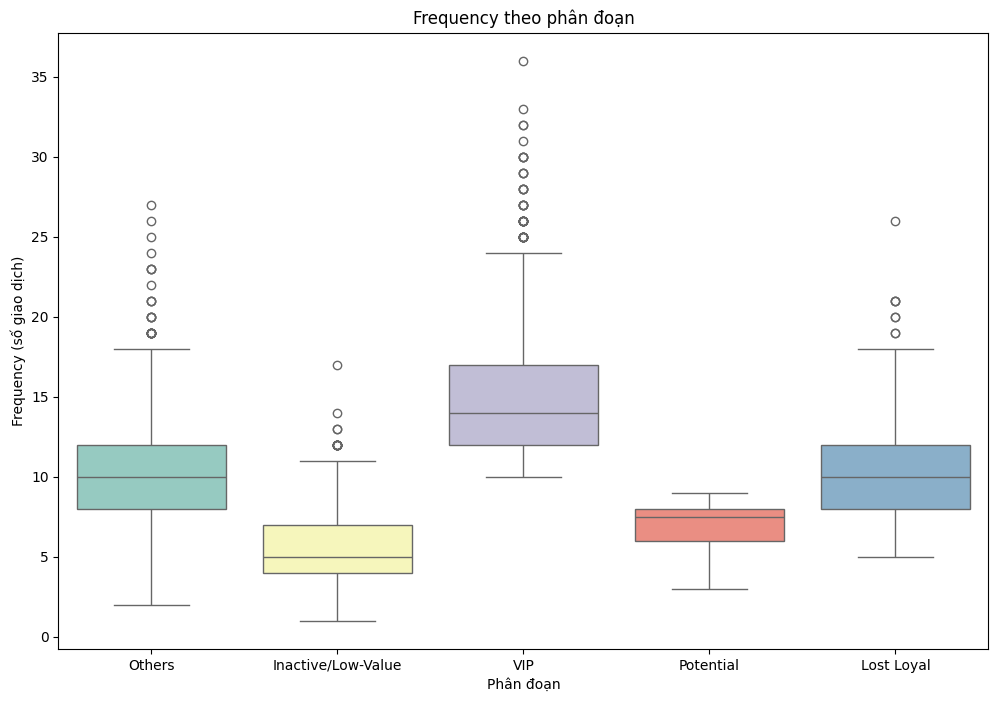

<ipython-input-27-bd68c7b4ca42>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Segment", y="Monetary", data=rfm, palette="Set3")


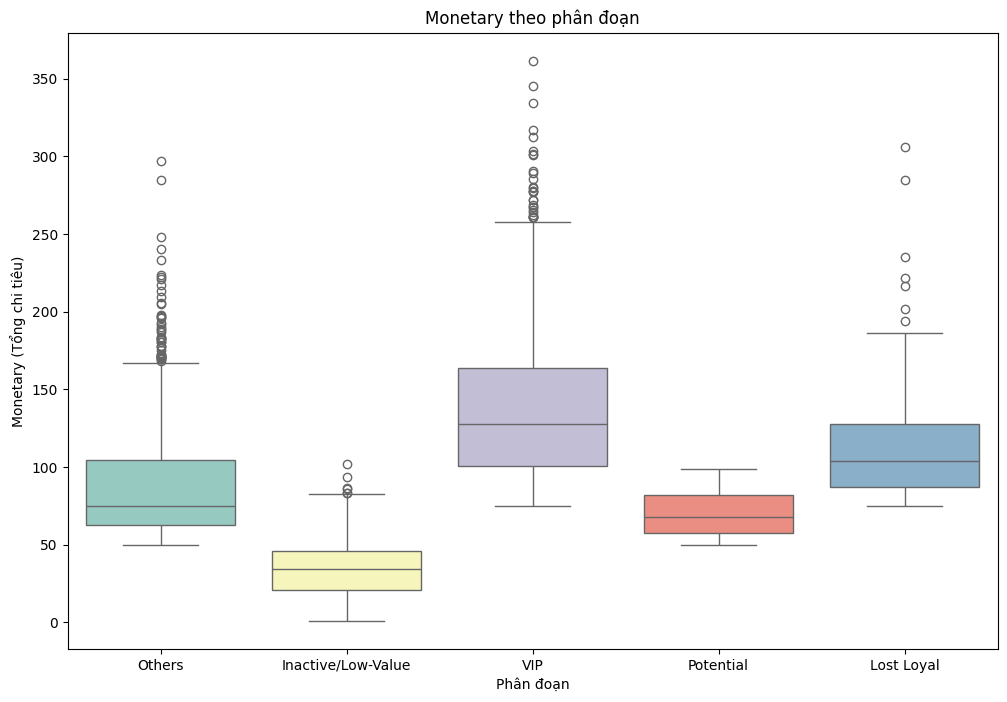

In [27]:
# 2. Boxplots cho từng chỉ số RFM theo phân đoạn
plt.figure(figsize=(12,8))
sns.boxplot(x="Segment", y="Recency", data=rfm, palette="Set3")
plt.title("Recency theo phân đoạn")
plt.xlabel("Phân đoạn")
plt.ylabel("Recency (số ngày)")
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x="Segment", y="Frequency", data=rfm, palette="Set3")
plt.title("Frequency theo phân đoạn")
plt.xlabel("Phân đoạn")
plt.ylabel("Frequency (số giao dịch)")
plt.show()

plt.figure(figsize=(12,8))
sns.boxplot(x="Segment", y="Monetary", data=rfm, palette="Set3")
plt.title("Monetary theo phân đoạn")
plt.xlabel("Phân đoạn")
plt.ylabel("Monetary (Tổng chi tiêu)")
plt.show()